In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import yt
import numpy as np

# some of my stuff:
import dwarf as dw # dwarf analysis code
import cgs as cgs  # cgs constants and conversions
import copy #?


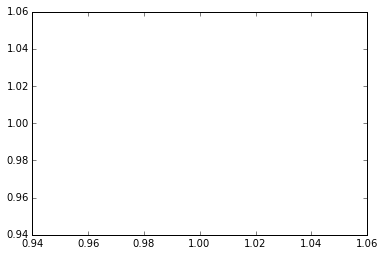

In [3]:
plt.plot(1,1)

In [10]:


ds_name = 'dwarf_fullp_hdf5'
ds_dir  = './../../flash_runs/carina_final/nosne_nowind_8pc/'
ds_selection = [0,10,50,100,150,200,221]

x_field = 'radius'    ; x_units = 'pc'
y_field = 'temperature'   ; y_units = 'K'
time_units = 'Myr'

normalize = True
outname = 'nosne_nowind_' + x_field + "_" + y_field + '_profiles.png'

nbin = 20

# code to plot profiles of some simulation run:
sim = dw.simulation(ds_name, ds_dir=ds_dir,reload_times=False)

# make the profile
dw.profile_1D(sim, x_field, y_field, nbin, ds_selection = ds_selection)

y_list = copy.deepcopy(sim.profiles[x_field][y_field])
x_list = copy.deepcopy(sim.profile_bins[x_field])
t_list = copy.deepcopy(sim.profile_times)

#print x_list
#print y_list

#for i in np.arange(len(ds_selection)):
y_list = [x for x in y_list if x is not None]
t_list = [x for x in t_list if x is not None]
x_list = x_list.convert_to_units(x_units).value


for i in np.arange(len(ds_selection)):
    y_list[i] = y_list[i].convert_to_units(y_units).value
    t_list[i] = t_list[i].convert_to_units(time_units).value



yt : [INFO     ] 2015-05-26 15:45:25,146 integer runtime parameter checkpointfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2015-05-26 15:45:25,169 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-05-26 15:45:25,169 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2015-05-26 15:45:25,170 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-05-26 15:45:25,171 Parameters: domain_right_edge         = [  2.46854206e+22   2.46854206e+22   2.46854206e+22]
yt : [INFO     ] 2015-05-26 15:45:25,171 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-05-26 15:45:26,172 Loading field plugins.
yt : [INFO     ] 2015-05-26 15:45:26,173 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-05-26 15:45:26,174 Loaded astro (15 new fields)
yt : [INFO     ] 2015-05-26 15:45:26,175 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-05-26 15:45:26,176 Loaded fluid (62 new fields)
yt : [INFO     

DWARF ANALYSIS : [INIT] Did not find parameter: sim_rhoCloud
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rho1rm
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rho2rm
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rhoRL
DWARF ANALYSIS : [INIT] Did not find parameter: sim_pAmbient
DWARF ANALYSIS : [INIT] Did not find parameter: sim_RL
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rScale
DWARF ANALYSIS : [INIT] Did not find parameter: particleFileIntervalTime
DWARF ANALYSIS : [INIT] Looking for supernova files
DWARF ANALYSIS : [INIT] No supernova feedback file found at ./../../flash_runs/carina_final/nosne_nowind_8pc/SNfeedback.dat
DWARF ANALYSIS : [INIT] No SB feedback file found at ./../../flash_runs/carina_final/nosne_nowind_8pc/SBfeedback.dat


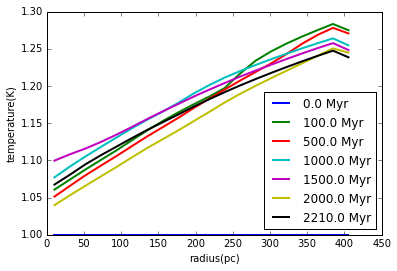

In [11]:


#fig = plt.figure(figsize=[6,6])
#ax1 = fig.add_sublot(111)#

if normalize:
    normalization = y_list[0]
else:
    normalization = 1.0

for i in np.arange(len(ds_selection)):
    plt.plot(x_list, y_list[i] / normalization, lw=2, label="%.1f Myr"%(t_list[i]))


plt.xlabel(x_field + '('+x_units+')')
plt.ylabel(y_field + '(' + y_units +')')
plt.legend(loc='best')

plt.savefig(outname)